## Setup Python statistical environment

In [1]:
import pandas as pd
#import pandasql as psql
import numpy as np
#import ggplot as gg

In [2]:
%matplotlib inline

## Read in the input dataset

In [3]:
df = pd.read_csv("turnstile_weather_v2.csv")

## Obtain some number statistics for the input dataset

In [4]:
df.UNIT.unique().size # Obtain the number of turnstile points

240

In [5]:
df.shape # Obtain the number of dataframe records and columns

(42649, 27)

In [6]:
df.station.unique().shape # Number of NYC subway stations

(207,)

In [7]:
df.UNIT.unique().shape # Number of telemetry UNITS in the NYC subway stations

(240,)

In [8]:
stations = df.groupby('station')

In [9]:
units_in_station = stations.UNIT.unique() # Find the UNITs in each section

In [10]:
units_in_station

station
1 AVE                          [R248]
103 ST-CORONA                  [R208]
104 ST                         [R007]
110 ST                         [R181]
110 ST-CPN                     [R323]
111 ST                   [R008, R310]
121 ST                         [R009]
125 ST                   [R034, R102]
135 ST                         [R207]
138 ST-GR CONC                 [R307]
14 ST                          [R105]
145 ST             [R101, R273, R344]
148 ST-LENOX                   [R345]
149 ST-3 AVE                   [R053]
149 ST-GR CONC                 [R205]
167 ST                   [R104, R221]
168 ST-BROADWAY                [R035]
169 ST                         [R115]
170 ST                         [R243]
174-175 ST                     [R253]
175 ST                         [R126]
176 ST                         [R309]
18 AVE                   [R242, R372]
18 ST                          [R321]
181 ST                         [R260]
182-183 ST                     [R237]
183 

In [11]:
nunits_in_station = pd.Series(units_in_station.map(len), index = units_in_station.index)

In [12]:
multiunit_stations = nunits_in_station[nunits_in_station > 1] # Subway stations having more than one unit

In [13]:
multiunit_stations.shape

(28,)

In [14]:
multiunit_stations

station
111 ST             2
125 ST             2
145 ST             3
167 ST             2
18 AVE             2
23 ST-6 AVE        2
25 ST              2
34 ST-HERALD SQ    2
34 ST-PENN STA     3
42 ST-TIMES SQ     2
50 ST              3
86 ST              3
ATLANTIC AVE       2
BOWLING GREEN      2
CHAMBERS ST        2
CHURCH AVE         2
DEKALB AVE         2
FORDHAM ROAD       2
GRAND ST           2
HOYT ST            2
JAY ST-METROTEC    2
LEXINGTON AVE      3
LEXINGTON-53 ST    2
NOSTRAND AVE       2
PROSPECT AVE       2
RECTOR ST          2
SPRING ST          2
WALL ST            2
Name: UNIT, dtype: int64

In [15]:
df.apply(pd.isnull,axis=0).any() # Checking input dataset for missing/NaN values

UNIT               False
DATEn              False
TIMEn              False
ENTRIESn           False
EXITSn             False
ENTRIESn_hourly    False
EXITSn_hourly      False
datetime           False
hour               False
day_week           False
weekday            False
station            False
latitude           False
longitude          False
conds              False
fog                False
precipi            False
pressurei          False
rain               False
tempi              False
wspdi              False
meanprecipi        False
meanpressurei      False
meantempi          False
meanwspdi          False
weather_lat        False
weather_lon        False
dtype: bool

In [16]:
df.describe().T # Printing the data ranges for each column

,count,mean,std,min,25%,50%,75%,max
ENTRIESn,42649,28124856.263242,30436070.292291,0.000000,10397624.000000,18183888.000000,32630491.000000,2.357746e+08
EXITSn,42649,19869932.521607,20289857.656428,0.000000,7613712.000000,13316091.000000,23937714.000000,1.493782e+08
ENTRIESn_hourly,42649,1886.589955,2952.385585,0.000000,274.000000,905.000000,2255.000000,3.281400e+04
EXITSn_hourly,42649,1361.487866,2183.845409,0.000000,237.000000,664.000000,1537.000000,3.482800e+04
hour,42649,10.046754,6.938928,0.000000,4.000000,12.000000,16.000000,2.000000e+01
day_week,42649,2.905719,2.079231,0.000000,1.000000,3.000000,5.000000,6.000000e+00
weekday,42649,0.714436,0.451688,0.000000,0.000000,1.000000,1.000000,1.000000e+00
latitude,42649,40.724647,0.071650,40.576152,40.677107,40.717241,40.759123,4.088918e+01
longitude,42649,-73.940364,0.059713,-74.073622,-73.987342,-73.953459,-73.907733,-7.375538e+01
fog,42649,0.009824,0.098631,0.000000,0.000000,0.000000,0.000000,1.000000e+00


## Plotting the UNITs/stations on a map

### Determining whether it's the UNITs or the stations that have unique coordinates

In [28]:
units = df.groupby('UNIT')

In [39]:
(units.latitude.unique().apply(len) > 1).any()

False

In [33]:
(stations.latitude.unique().apply(len) > 1).any()

True

Obviously, it is the UNITs that have unique coordinates (latitude/longitude tuple).

### Plotting the UNITs on a map

In [76]:
unit_coords = pd.DataFrame({'latitude':units.latitude.unique(), 'longitude':units.longitude.unique()})

In [69]:
unit_coords

,latitude,longitude
UNIT,,
R003,[40.689945],[-73.872564]
R004,[40.69132],[-73.867135]
R005,[40.692304],[-73.860151]
R006,[40.693866],[-73.851568]
R007,[40.695184],[-73.844326]
R008,[40.697405],[-73.836354]
R009,[40.700536],[-73.828382]
R011,[40.757303],[-73.989787]
R012,[40.752247],[-73.993456]


In [155]:
import math

def WGS84toGoogleBing(lat, lon):
  x = lon * 20037508.34 / 180.0;
  y = math.log(math.tan((90.0 + lat) * math.pi / 360.0)) / (math.pi / 180.0);
  y = y * 20037508.34 / 180.0;
  return (x, y)

In [156]:
unit_coords = unit_coords.assign(coords=unit_coords.apply(lambda row: WGS84toGoogleBing(row[0][0],row[1][0]), axis=1))

In [174]:
   
map_coords = {'xmin':-8251109.673785778, 'ymin':4947908.707295347, 'xmax':-8202189.975683266, 'ymax': 4996828.40539786}

In [181]:
def proj2pic(x, y):
    xsize, ysize = 1280, 1280
    xscale = map_coords['xmax'] - map_coords['xmin']
    yscale = map_coords['ymax'] - map_coords['ymin']
    
    picx = xsize * (x - map_coords['xmin']) / xscale
    picy = ysize - (ysize * (y - map_coords['ymin']) / yscale)
    
    return (picx, picy)

In [182]:
unit_coords

,latitude,longitude,coords,pic_coords
UNIT,,,,
R003,[40.689945],[-73.872564],"(-8223456.20693, 4966715.630427459)","(745.562060885, 687.9106670147845)"
R004,[40.69132],[-73.867135],"(-8222851.85341, 4966917.498055205)","(761.375169505, 682.628734101528)"
R005,[40.692304],[-73.860151],"(-8222074.39809, 4967061.964427493)","(781.717543902, 678.8487239276932)"
R006,[40.693866],[-73.851568],"(-8221118.9429, 4967291.2944933735)","(806.717343366, 672.8482272829177)"
R007,[40.695184],[-73.844326],"(-8220312.76715, 4967484.805094864)","(827.811197229, 667.7849587118587)"
R008,[40.697405],[-73.836354],"(-8219425.32817, 4967810.90407905)","(851.031330204, 659.2524714736323)"
R009,[40.700536],[-73.828382],"(-8218537.88919, 4968270.63254999)","(874.251463178, 647.2235247378968)"
R011,[40.757303],[-73.989787],"(-8236505.4116, 4976609.550012535)","(404.125326355, 429.03300504803815)"
R012,[40.752247],[-73.993456],"(-8236913.84281, 4975866.548713454)","(393.43858929, 448.4738785552954)"


In [183]:
import matplotlib.pyplot as plt

In [184]:
unit_coords = unit_coords.assign(pic_coords = unit_coords.apply(lambda row: proj2pic(row[2][0],row[2][1]), axis=1))

In [185]:
plt.rcParams['figure.figsize'] = (12.0, 12.0)

In [186]:
google_nyc_map = plt.imread("./staticmap.png")

In [187]:
google_nyc_map.shape

(1280, 1280, 3)

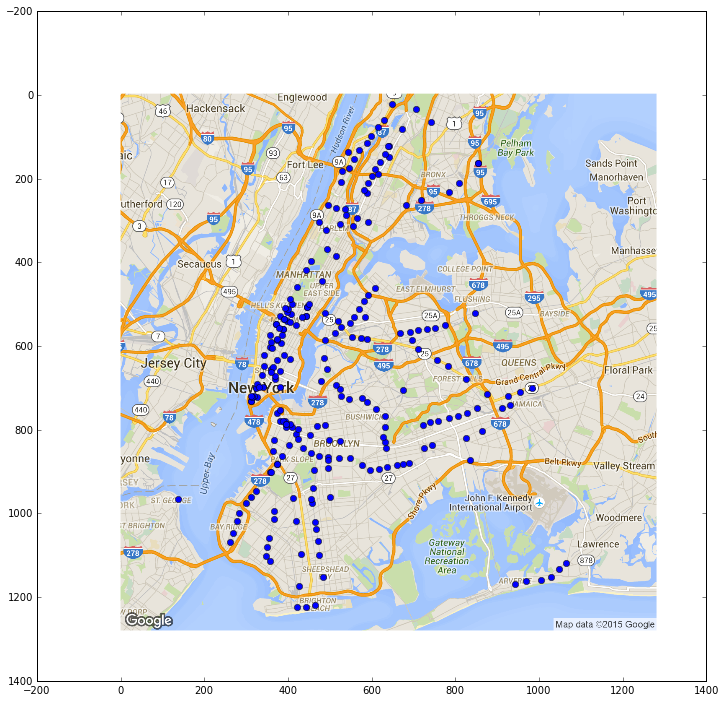

In [188]:
plt.imshow(google_nyc_map)
picx,picy = proj2pic(unit_coords.coords["R003"][0], unit_coords.coords["R003"][1])
xx,yy = zip(*unit_coords.pic_coords.values)
plt.plot(xx,yy,"bo")
#plt.plot(picx,picy,"bo")